# Exam: Income and Wealth Inequality

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find stationary equilibrium](#toc2_)    
- 3. [Test path](#toc3_)    
- 4. [Transition path](#toc4_)    
- 5. [Constant capital income](#toc5_)    
- 6. [Inequality in the stationary equilibrium](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt  
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

from HANCModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path

## 2. <a id='toc2_'></a>[Find stationary equilibrium](#toc0_)

In [4]:
model.find_ss(do_print=True)

### step 1: broad search ###

implied ss.r = 0.0000
implied ss.w = 1.1209
household problem in ss solved in 3.1 secs [314 iterations]
household problem in ss simulated in 3.8 secs [346 iterations]
implied ss.C_hh = 1.1211
implied ss.A_hh = 1.0574
clearing_A =  -3.74658341

implied ss.r = 0.0044
implied ss.w = 1.1002
household problem in ss solved in 0.2 secs [363 iterations]
household problem in ss simulated in 0.1 secs [413 iterations]
implied ss.C_hh = 1.1063
implied ss.A_hh = 1.3152
clearing_A =  -3.19944519

implied ss.r = 0.0089
implied ss.w = 1.0808
household problem in ss solved in 0.3 secs [422 iterations]
household problem in ss simulated in 0.1 secs [511 iterations]
implied ss.C_hh = 1.0959
implied ss.A_hh = 1.6814
clearing_A =  -2.57236157

implied ss.r = 0.0133
implied ss.w = 1.0624
household problem in ss solved in 0.4 secs [495 iterations]
household problem in ss simulated in 0.1 secs [667 iterations]
implied ss.C_hh = 1.0924
implied ss.A_hh = 2.2286
clearing_A =  -1.7888

## 3. <a id='toc3_'></a>[Test path](#toc0_)

In [5]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
alpha          : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  2.8e-14, max abs.  1.1e-08
clearing_Y     : t0 =  6.7e-15, max abs.  4.1e-10
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
r              : t0 = -3.5e-18, max abs.  3.5e-18
rK             : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
std_a          : t0 =  1.6e-14, max abs.  1.9e-08
skew_a         : t0 =  2.4e-14, max abs.  5.0e-09
std_y          : t0 =  0.0e+00, max abs.  3.9e-16
capital_income : t0 =  0.0e+00, max abs.  0.0e+00
tax            : t0 =  0.0e+00, max abs.  0.0e+00
transfer       : t0

## 4. <a id='toc4_'></a>[Transition path](#toc0_)

In [6]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for rK              in 0.5 secs
curly_Y and curly_D calculated for tax             in 0.5 secs
curly_Y and curly_D calculated for transfer        in 0.5 secs
curly_Y and curly_D calculated for w               in 0.5 secs
curly_E calculated in 1.6 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 4.0 secs

full Jacobians:
full Jacobian to unknowns computed in 9.7 secs [in evaluate_path(): 9.5 secs]
full Jacobian to shocks computed in 9.8 secs [in evaluate_path(): 9.6 secs]


In [7]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.90e-01
 it =   1 -> max. abs. error = 2.85e-03
 it =   2 -> max. abs. error = 4.73e-05
 it =   3 -> max. abs. error = 9.25e-08
 it =   4 -> max. abs. error = 5.53e-10
 it =   5 -> max. abs. error = 2.85e-13

transition path found in 3.7 secs


### varnames ###


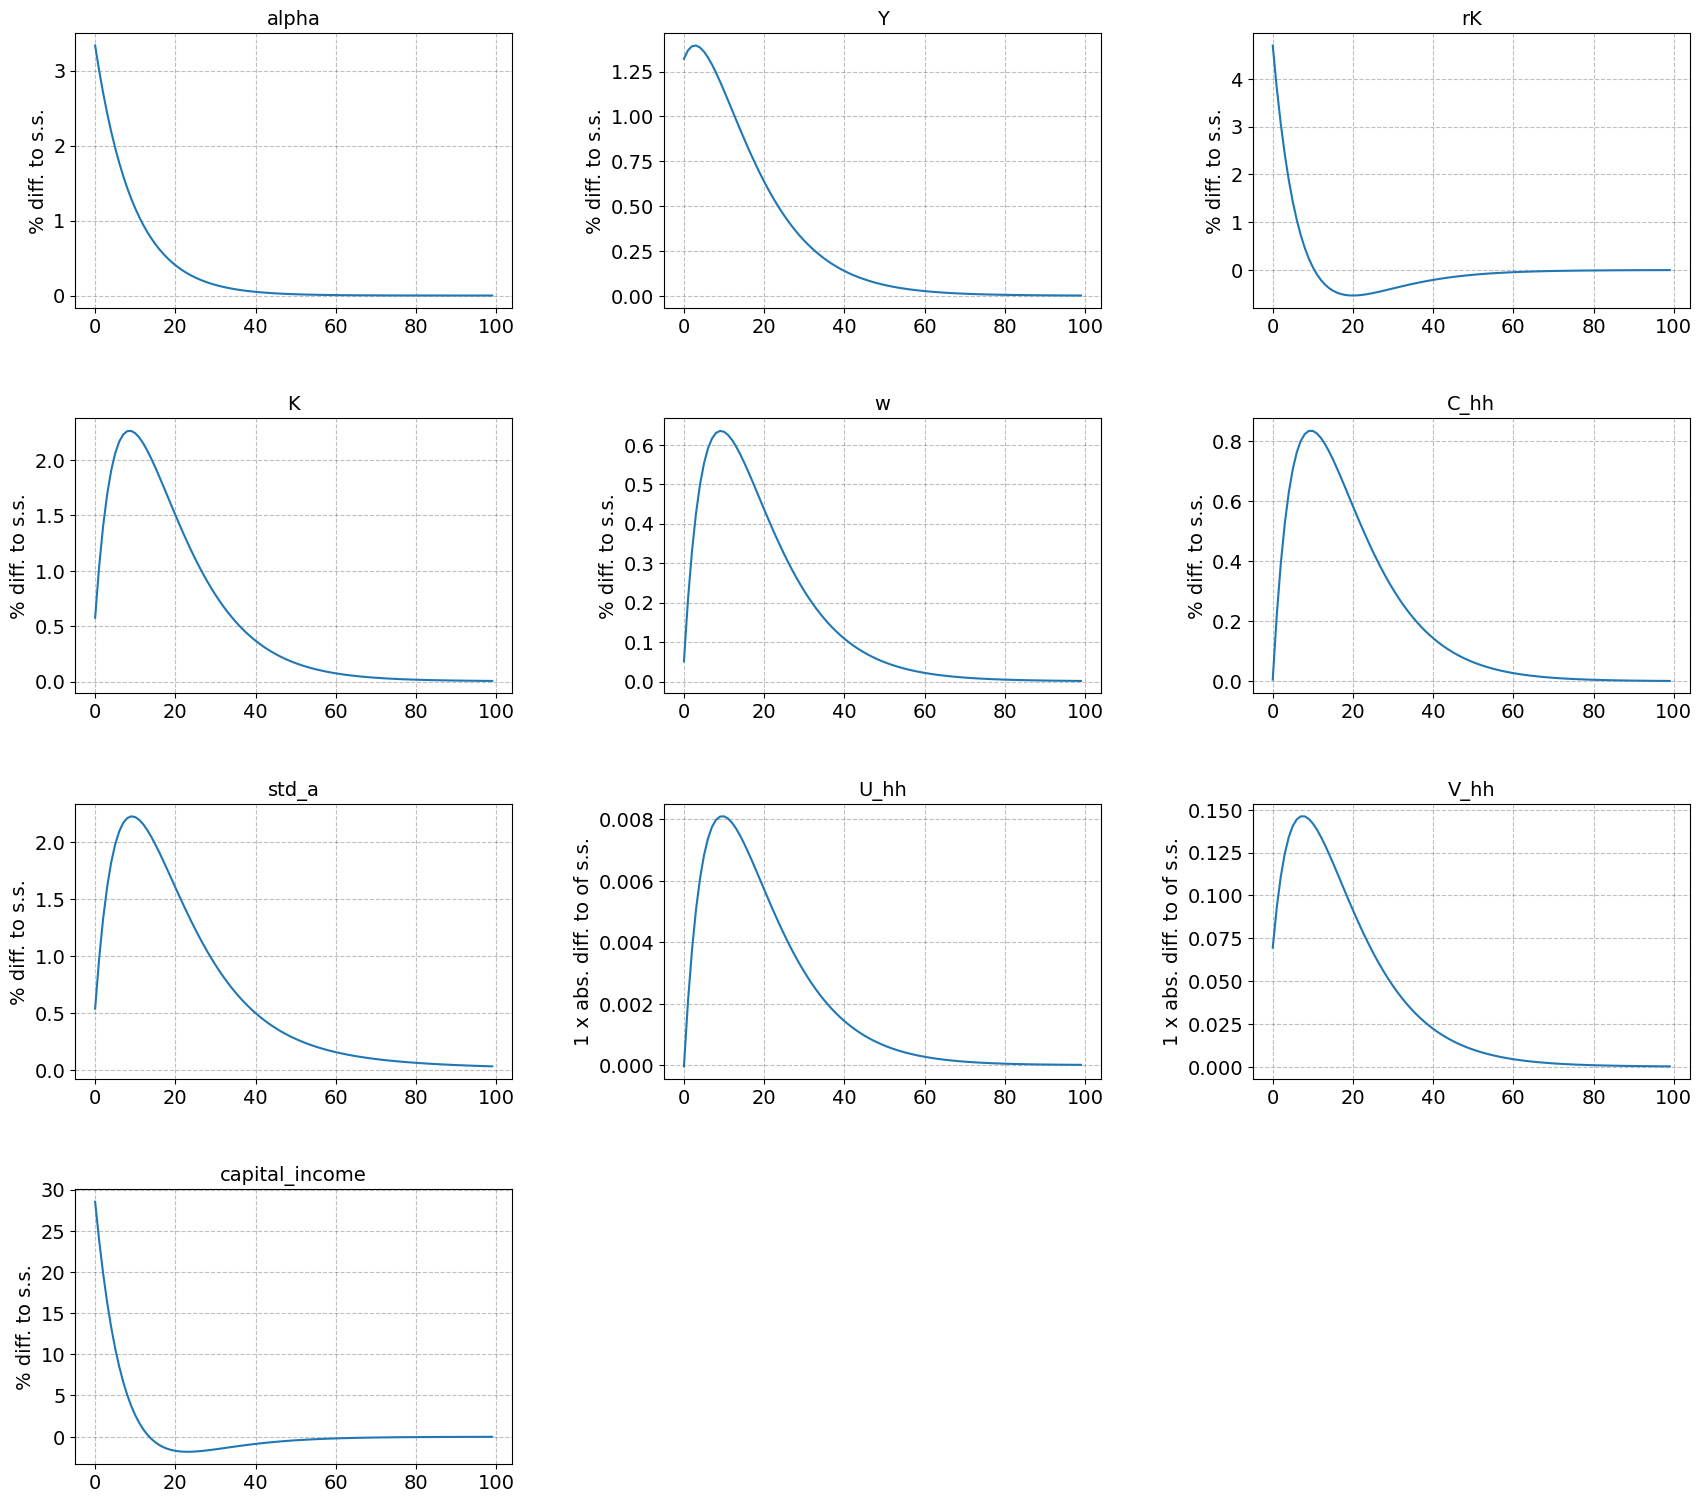

In [8]:
paths = ['alpha','Y','rK','K','w','C_hh','std_a','U_hh','V_hh','capital_income']
abs_diff = ['U_hh','V_hh']
model.show_IRFs(paths,abs_diff=abs_diff,do_shocks=False,do_targets=False,T_max=100,ncols=3)

['rK']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.1 secs

['w']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.1 secs

None
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.1 secs

all
household problem simulated along transition in 0.1 secs



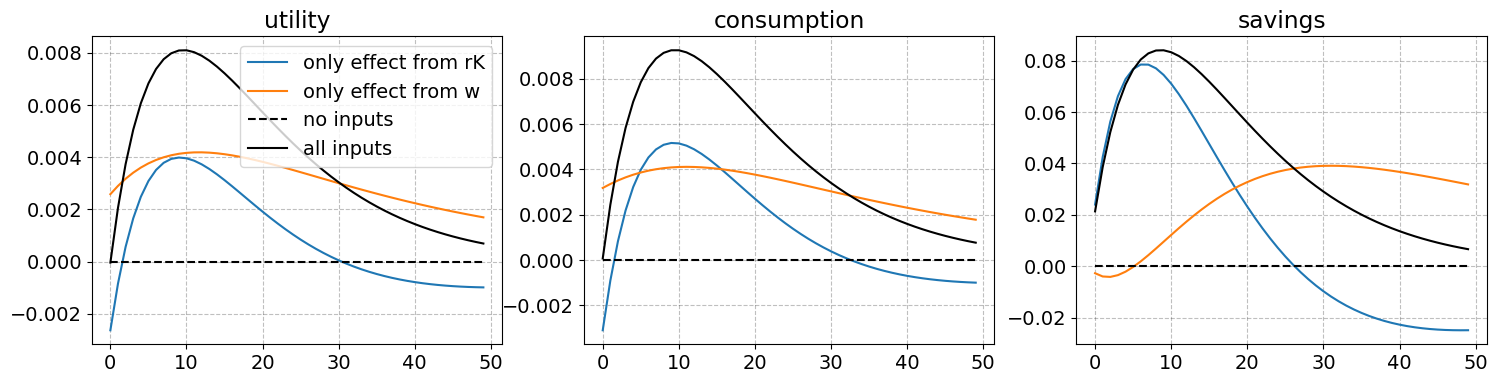

In [9]:
def decompo_drivers(model,T_max=100):
    
    par = model.par
    ss = model.ss
    
    T_max = 50

    fig = plt.figure(figsize=(3*6,4),dpi=100)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    ax1.set_title('utility')
    ax2.set_title('consumption')
    ax3.set_title('savings')

    i_color = 0
    for use_inputs in [['rK'],['w'],None,'all']:

        # a. compute
        print(use_inputs)
        path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
        print('')

        # b. plot
        if use_inputs is None:
            label = 'no inputs'
            ls = '--'
            color = 'black'
        elif use_inputs == 'all':
            label = 'all inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'only effect from {use_inputs[0]}'
            ls = '-'
            color = colors[i_color]
            i_color += 1

        ax1.plot(path_alt.U_hh[0,:50]-ss.U_hh,ls=ls,color=color,label=label);
        ax2.plot(path_alt.C_hh[0,:50]-ss.C_hh,ls=ls,color=color,label=label);
        ax3.plot(path_alt.A_hh[0,:50]-ss.A_hh,ls=ls,color=color,label=label);

    ax1.legend(frameon=True)
    
decompo_drivers(model)    

change in V: 0.0695
 beta = 0.950: 0.0655
 beta = 0.960: 0.0712
 beta = 0.970: 0.0719


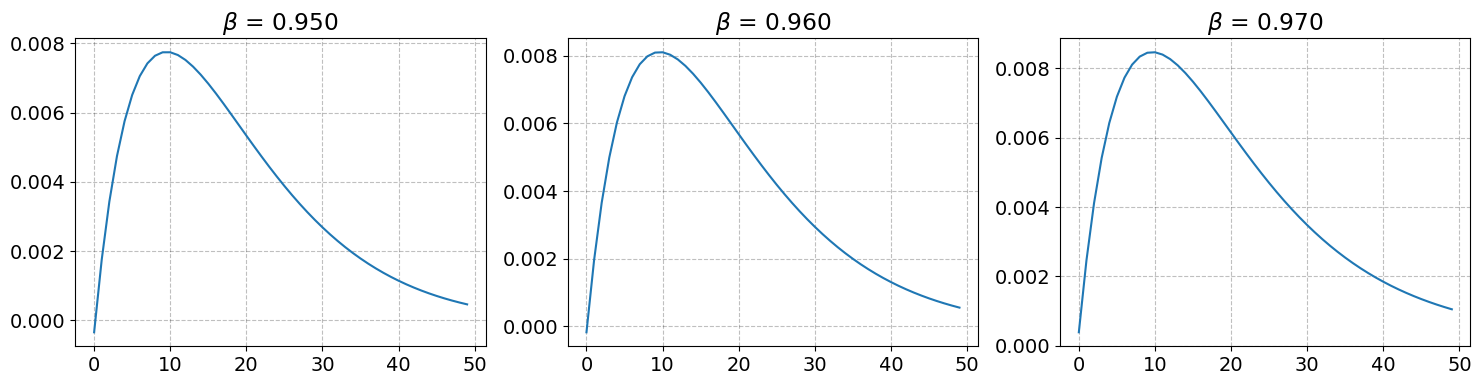

In [10]:
def decompo_groups(model,T_max=100):
    
    par = model.par
    ss = model.ss
    path = model.path
    
    print(f'change in V: {path.V_hh[0,0]-ss.V_hh:.4f}')
    
    fig = plt.figure(figsize=(3*6,4),dpi=100)
    for i_fix in range(par.Nfix):

        Dbeg = ss.Dbeg.copy()
        for i_fix_ in range(par.Nfix):
            if i_fix_ == i_fix: continue
            Dbeg[i_fix_,:,:,] = 0.0

        Dbeg /= np.sum(Dbeg) # re-normalize

        path_alt_ss = model.decompose_hh_path(Dbeg=Dbeg,use_inputs=None)    
        path_alt = model.decompose_hh_path(Dbeg=Dbeg,use_inputs='all') 
        
        print(f' beta = {par.beta_grid[i_fix]:.3f}: {path_alt.V_hh[0,0]-path_alt_ss.V_hh[0,0]:.4f}')
              
        ax = fig.add_subplot(1,3,1+i_fix)
        ax.set_title(f'$\\beta$ = {par.beta_grid[i_fix]:.3f}')

        ax.plot(path_alt.U_hh[0,:50]-path_alt_ss.U_hh[0,:50]);

decompo_groups(model)

## 5. <a id='toc5_'></a>[Constant capital income](#toc0_)

In [11]:
model_ = model.copy()
model_.unknowns = ['K','tax']
model_.targets = ['clearing_A','policy_target']
model_.allocate()     
model_.find_ss()

In [12]:
model_.compute_jacs()

In [13]:
model_.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.90e-01
   1.90e-01 in clearing_A
   2.09e-02 in policy_target
 it =   1 -> max. abs. error = 1.57e-02
   1.57e-02 in clearing_A
   5.96e-03 in policy_target
 it =   2 -> max. abs. error = 4.00e-03
   4.00e-03 in clearing_A
   1.18e-03 in policy_target
 it =   3 -> max. abs. error = 2.72e-04
   2.72e-04 in clearing_A
   6.29e-05 in policy_target
 it =   4 -> max. abs. error = 1.98e-05
   1.98e-05 in clearing_A
   8.01e-06 in policy_target
 it =   5 -> max. abs. error = 2.71e-06
   2.71e-06 in clearing_A
   7.80e-07 in policy_target
 it =   6 -> max. abs. error = 1.80e-07
   1.80e-07 in clearing_A
   3.91e-08 in policy_target
 it =   7 -> max. abs. error = 5.43e-09
   5.43e-09 in clearing_A
   2.94e-10 in policy_target
 it =   8 -> max. abs. error = 4.74e-10
   4.74e-10 in clearing_A
   2.41e-11 in policy_target
 it =   9 -> max. abs. error = 3.78e-11
   3.78e-11 in clearing_A
   2.35e-12 in policy_target
 it =  10 -> max. abs

### varnames ###


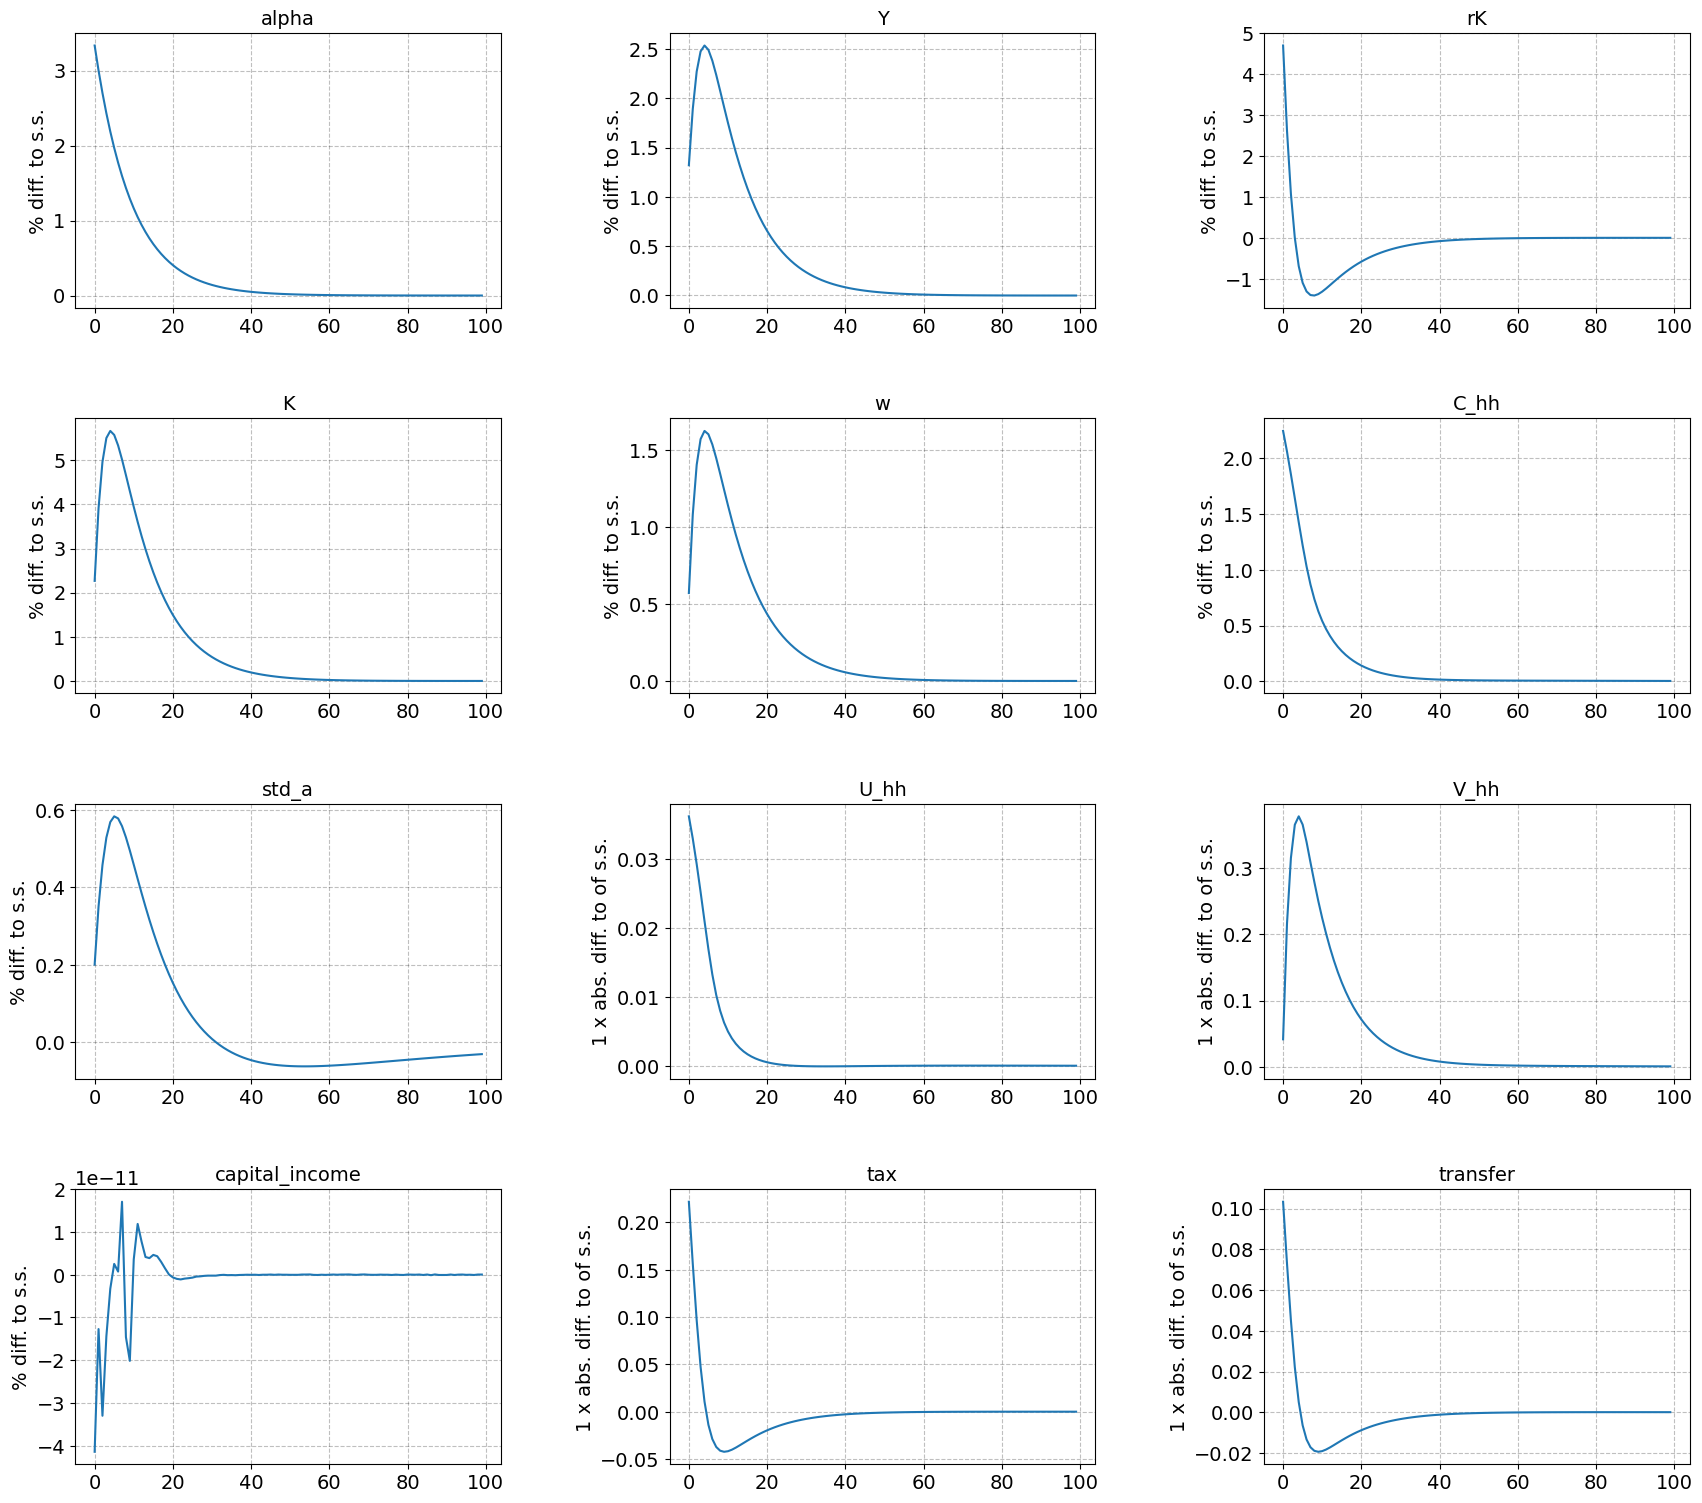

In [14]:
paths += ['tax','transfer']
abs_diff += ['tax','transfer']
model_.show_IRFs(paths,abs_diff=abs_diff,do_shocks=False,do_targets=False,T_max=100,ncols=3)

['rK']
household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.1 secs

['w']
household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.1 secs

None
household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.1 secs

all
household problem simulated along transition in 0.1 secs



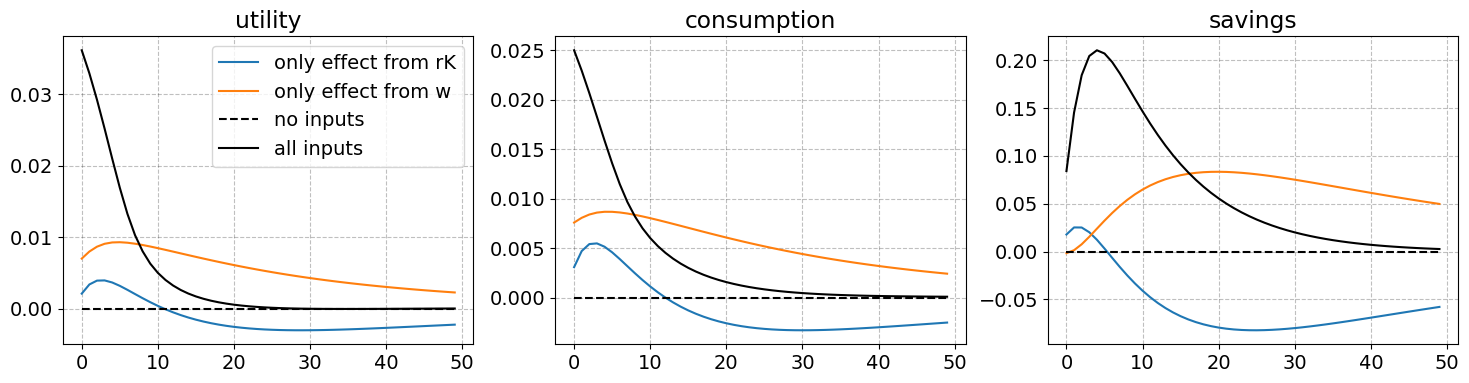

In [15]:
decompo_drivers(model_)

change in V: 0.0416
 beta = 0.950: 0.0763
 beta = 0.960: 0.0378
 beta = 0.970: 0.0106


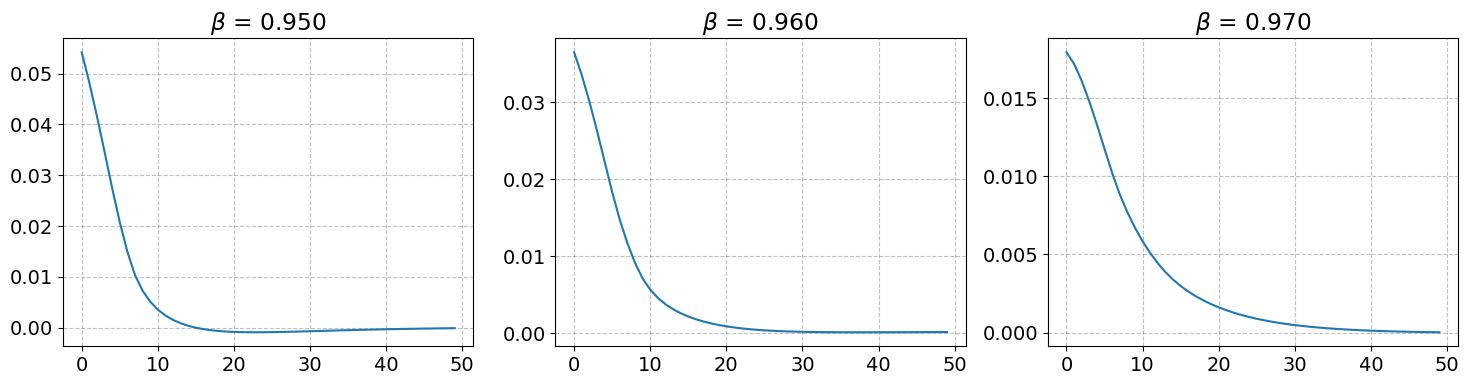

In [16]:
decompo_groups(model_)

**Note:** This is good for the low $\beta$ group, but bad for the others.

## 6. <a id='toc6_'></a>[Inequality in the stationary equilibrium](#toc0_)

In [17]:
specs = {
    'sigma_psi':[0.10,0.12,0.14],
    'sigma_beta':[0.01,0.02,0.03],
    'sigma_chi':[0.10,0.20,0.30]
}

for k,vs in specs.items():
    for v in vs:
    
        model_ = model.copy()
        model_.par.__dict__[k] = v
        model_.find_ss()
    
        par = model_.par
        ss = model_.ss
    
        print(f'{k:10s} = {v:.3f}: {ss.A_hh = :.2f}, {ss.std_y = :.2f}, {ss.std_a = :.2f}, {ss.skew_a = :.2f}')
    
    print('')

sigma_psi  = 0.100: ss.A_hh = 3.71, ss.std_y = 0.32, ss.std_a = 4.75, ss.skew_a = 2.25
sigma_psi  = 0.120: ss.A_hh = 3.86, ss.std_y = 0.39, ss.std_a = 4.93, ss.skew_a = 2.25
sigma_psi  = 0.140: ss.A_hh = 4.03, ss.std_y = 0.46, ss.std_a = 5.19, ss.skew_a = 2.25

sigma_beta = 0.010: ss.A_hh = 3.71, ss.std_y = 0.32, ss.std_a = 4.75, ss.skew_a = 2.25
sigma_beta = 0.020: ss.A_hh = 4.06, ss.std_y = 0.32, ss.std_a = 6.38, ss.skew_a = 2.54
sigma_beta = 0.030: ss.A_hh = 4.52, ss.std_y = 0.32, ss.std_a = 7.75, ss.skew_a = 2.48

sigma_chi  = 0.100: ss.A_hh = 3.71, ss.std_y = 0.32, ss.std_a = 4.75, ss.skew_a = 2.25
sigma_chi  = 0.200: ss.A_hh = 3.73, ss.std_y = 0.32, ss.std_a = 4.97, ss.skew_a = 2.81
sigma_chi  = 0.300: ss.A_hh = 3.75, ss.std_y = 0.32, ss.std_a = 5.47, ss.skew_a = 4.10

